# ANALYSING AND CLASSIFYING BREAST TUMOURS INTO MALIGNANT OR NON MALIGNANT



**EXTRACTING THE DATASET**

In [1]:
from zipfile import ZipFile
file_name = "/content/breast-cancer-wisconsin-data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**READING THE DATASET AND CONVERTING IT INTO DATAFRAME**

In [2]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**SHAPE OF THE DATAFRAME**

In [3]:
df.shape

(569, 33)

**CHECKING WHETHER THERE ARE ANY MISSING VALUES OR NOT**

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df=df.drop('Unnamed: 32',axis=1)
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
df=df.drop('id',axis=1)

**ONE_HOT ENCODING OF THE COLUMN "DIAGNOSIS"**

In [0]:
df['Diagonosis'] = df['diagnosis'].map({"M": 1, "B": 0})
df=df.drop('diagnosis',axis=1)

In [8]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagonosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [9]:
x=df.copy()
x.drop('Diagonosis',axis=1,inplace=True)
y=df['Diagonosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**SPLITTIG THE DATAFRAME INTO TEST AND TRAIN AND PREDICTING THE RANDOM_STATE**

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
ts_score=[]
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
  lr = RandomForestClassifier().fit(x_train, y_train)
  ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

11


***USING THE RANDOM_STATE VALUE(K) TO SPLIT INTO TEST AND TRAIN***

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=k )
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagonosis
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,0.05914,0.2505,1.0250,1.740,19.68,0.004854,0.018190,0.01826,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.08660,0.2618,0.07609,0
456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,0.3135,2.4260,2.150,23.13,0.009861,0.024180,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115,1
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881,0


In [0]:
x_train=train
x_train=x_train.drop('Diagonosis', axis=1)
y_train=train['Diagonosis']

In [14]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,0.05914,0.2505,1.0250,1.740,19.68,0.004854,0.018190,0.01826,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.08660,0.2618,0.07609
456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,0.3135,2.4260,2.150,23.13,0.009861,0.024180,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881


In [15]:
y_train.head()

2      1
74     0
456    0
564    1
411    0
Name: Diagonosis, dtype: int64

In [0]:
x_test=test
x_test=x_test.drop('Diagonosis', axis=1)
y_test=test['Diagonosis']

In [17]:
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,19.18,22.49,127.5,1148.0,0.08523,0.1428,0.1114,0.06772,0.1767,0.05529,0.4357,1.0730,3.833,54.22,0.005524,0.03698,0.02706,0.01221,0.01415,0.003397,23.36,32.06,166.4,1688.0,0.1322,0.5601,0.3865,0.1708,0.3193,0.09221
162,19.59,18.15,130.7,1214.0,0.11200,0.1666,0.2508,0.12860,0.2027,0.06082,0.7364,1.0480,4.792,97.07,0.004057,0.02277,0.04029,0.01303,0.01686,0.003318,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223
70,18.94,21.31,123.6,1130.0,0.09009,0.1029,0.1080,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
393,21.61,22.28,144.4,1407.0,0.11670,0.2087,0.2810,0.15620,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.04718,0.01288,0.02045,0.004028,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
56,19.21,18.57,125.5,1152.0,0.10530,0.1267,0.1323,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.02945,0.01538,0.01852,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294


In [18]:
y_test.head()

198    1
162    1
70     1
393    1
56     1
Name: Diagonosis, dtype: int64

##IMPORTING VARIOUS MACHINE LEARNING LIBRARIES##

In [0]:
import numpy as np 


import pandas as pd 
import numpy as np


from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


##SCALING THE VALUES TO A CERTAIN RANGE##

In [0]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(x_train)
train_set_scaled = scaler.transform(x_train)
test_set_scaled = scaler.transform(x_test)

##RANDOM FOREST CLASSIFIER##

In [22]:
#Random_Forest
from sklearn.ensemble import RandomForestClassifier
clc=RandomForestClassifier(n_estimators=100, max_depth=3,random_state=34)
clc.fit(x_train, y_train)
accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.37 %.


##LOGISTIC REGRESSION##

In [23]:
#Logistic_Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_test, y_test) * 100, 2)
print(acc_log)

94.74


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##DECISION TREE##

In [24]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree)

95.61


##K_NEAREST NEIGHBOUR##

In [25]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print(acc_knn)

92.98


##COMPARING THE ACCURACY OF DIFFERENT MODELS##

In [26]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Linear Svm,0.947368
Radial Svm,0.666667
Logistic Regression,0.947368
KNN,0.929825
Decision Tree,0.947368


##PLOTTING THE HEATMAP TO SEE CO RELATION AMONG ALL THE FEATURES##

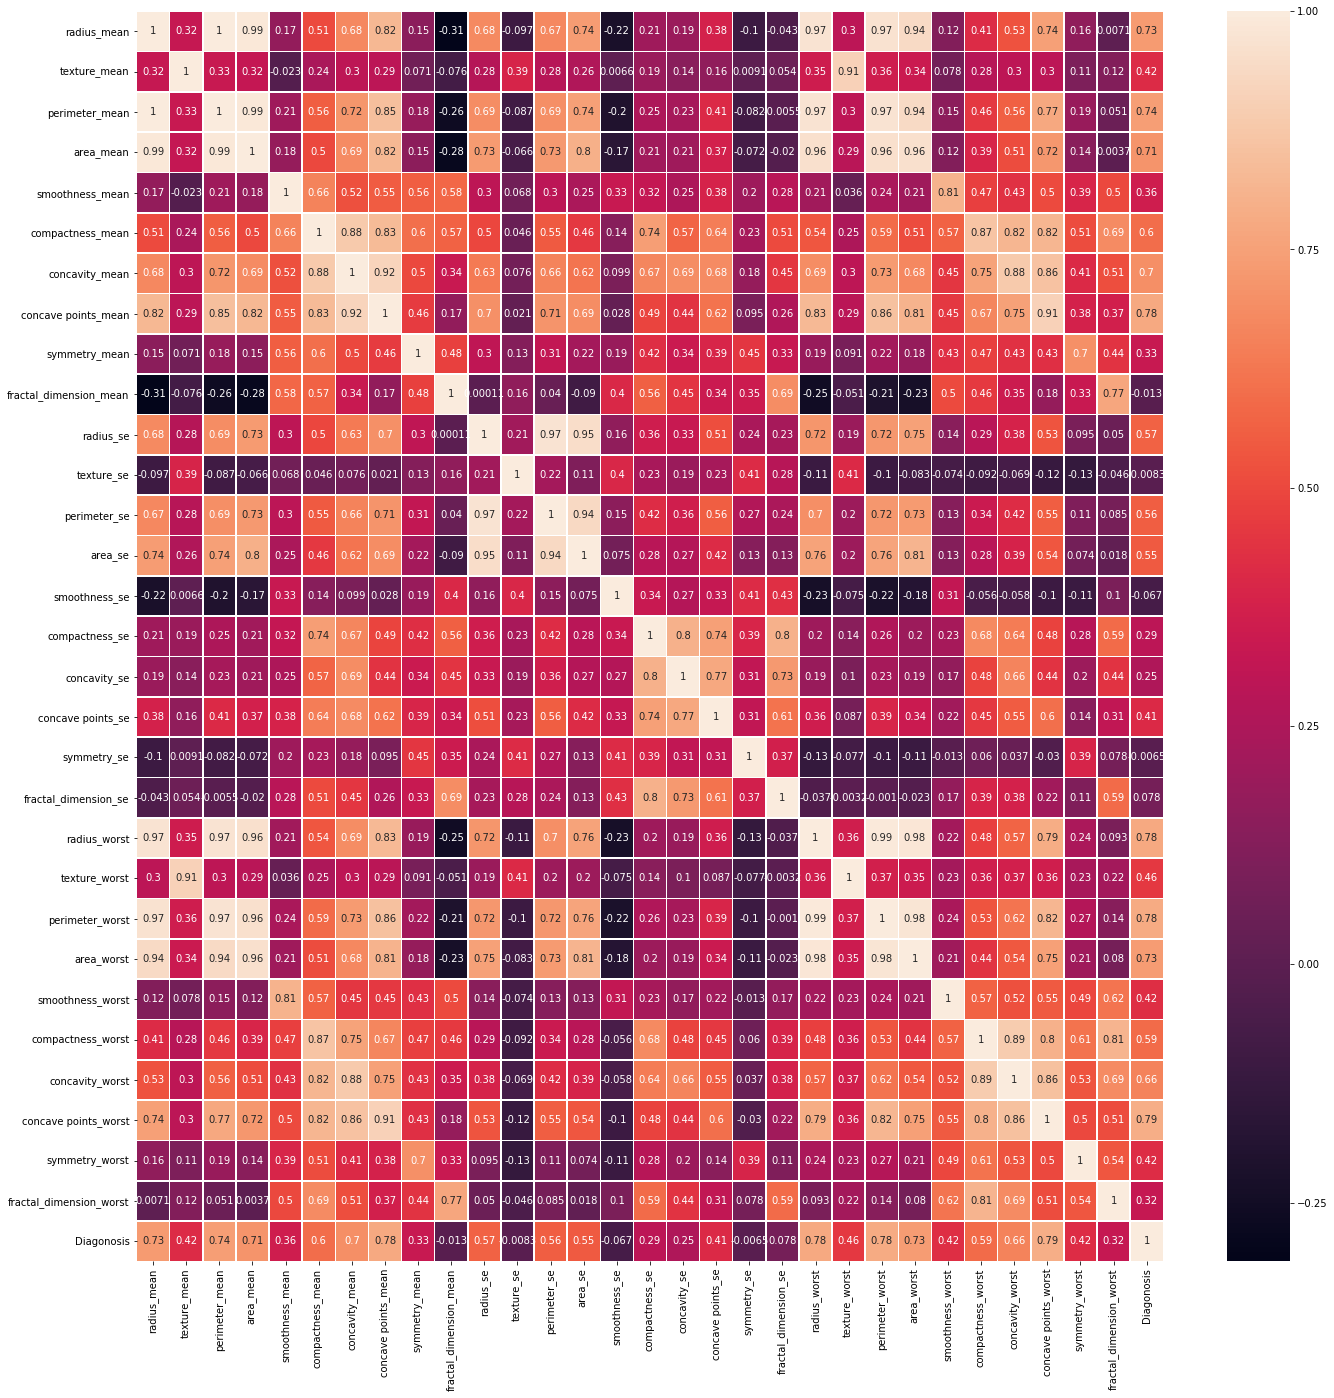

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(23,23))
sns.heatmap(df.corr(), annot = True,linewidths=0.5)

##IMPORTANCE OF THE FEATURES ARE ARRANGED IN DESCENDING ORDER##

In [29]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(clc.fit(x_train, y_train).feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
perimeter_worst,0.207
radius_worst,0.158
concave points_worst,0.152
area_worst,0.114
concave points_mean,0.064
area_mean,0.045
radius_mean,0.034
perimeter_mean,0.031
concavity_worst,0.029


##IMPORTANCE BAR PLOT##

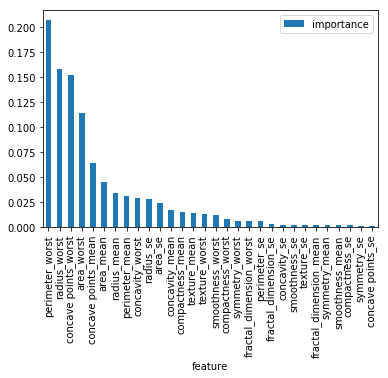

In [30]:
importances.plot.bar()

#CREATING NEW FEATURES BASED ON THEIR PRIORITY/IMPORTANCE##

In [0]:
df['new1']=(df['concave points_worst']+df['perimeter_worst']+df['concave points_mean'])/3
df['new2']=df['area_worst']+df['area_mean']
df['new3']=(df['area_se']+df['concavity_worst']+df['area_mean'])/3


In [32]:
x=df.copy()
x.drop('Diagonosis',axis=1,inplace=True)
y=df['Diagonosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new1,new2,new3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,61.670833,3020.0,385.037300
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,53.018723,3282.0,466.773867
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,50.956967,2912.0,432.493467
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,33.077567,953.8,138.005633
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,50.822267,2872.0,463.946667


**IMPORTING MACHINE LEARNING ALGORITHM TOOLS AND LIBRARIES**

In [0]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

##AGAIN SPPLITTING THE NEWLY MODIFIED DATASET IN TEST AND TRAIN##

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=k )
train.head()

x_train=train
x_train=x_train.drop('Diagonosis', axis=1)
y_train=train['Diagonosis']

x_test=test
x_test=x_test.drop('Diagonosis', axis=1)
y_test=test['Diagonosis']

**SCALING THE VALUES TO TAKE IT INTO A CERTAIN RANGE**

In [0]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(x_train)
train_set_scaled = scaler.transform(x_train)
test_set_scaled = scaler.transform(x_test)

**RANDOM FOREST CLASSIFIER**

In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clc=RandomForestClassifier(n_estimators=100, max_depth=7,random_state=64)
clc.fit(x_train, y_train)
accuracy=clc.score(x_test,y_test)*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.25 %.


**LOGISTIC REGRESSION**

In [40]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_test, y_test) * 100, 2)
print(acc_log)

94.74


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**DECISION TREE**

In [41]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree)

93.86


**K NEAREST NEIGHBOUR**

In [42]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print(acc_knn)

92.98


In [43]:
#PERCEPTRON(NEURAL_NETWOK WITH SINGLE OUTPUT)
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
print(acc_perceptron)

87.72


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# ***COMPARING ALL THE ACCURACY SCORES WE FIND THAT THE BEST FIT MODEL IS RANDOM FOREST CLASSIFIER***